In [18]:
# Import

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import cv2

# deep learning libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3, ResNet50, VGG16, InceptionV3, MobileNet, Xception

# Define the input shape based on the model's requirements
InceptionV3_input_shape = (299, 299, 3)  # InceptionV3 requires (299, 299, 3) input shape

import warnings
warnings.filterwarnings('ignore')


In [19]:
data_path = './data/UoA-import matplotlib.pyplot as plt
DR/' 
label_path = os.path.join(data_path, 'UoA-DR-labels.csv')
labels = pd.read_csv(label_path)

x_name = "image number"
y_name = "class"

possible_labels = sorted(labels[y_name].unique())

In [20]:
model = tf.keras.models.load_model('models/1510.h5')
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 11, 11, 2048)      20861480  
                                                                 
 batch_normalization_103 (B  (None, 11, 11, 2048)      14336     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_20 (Dense)            (None, 512)               1049088   
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [26]:
import tensorflow as tf
tf.keras.backend.set_image_data_format('channels_last')


2023-10-17 21:15:15.272663: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:437] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-10-17 21:15:15.272702: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:441] Memory usage: 25034752 bytes free, 8361213952 bytes total.
2023-10-17 21:15:15.272736: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:451] Possibly insufficient driver version: 515.65.1
2023-10-17 21:15:15.272782: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_impl.h:770 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential_5/xception/block1_conv1/Conv2D' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/csse/users/yyu69/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/csse/users/yyu69/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/csse/users/yyu69/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_613559/1211460320.py", line 14, in <module>
      prediction = model.predict(img / 255)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_5/xception/block1_conv1/Conv2D'
DNN library is not found.
	 [[{{node sequential_5/xception/block1_conv1/Conv2D}}]] [Op:__inference_predict_function_21278]

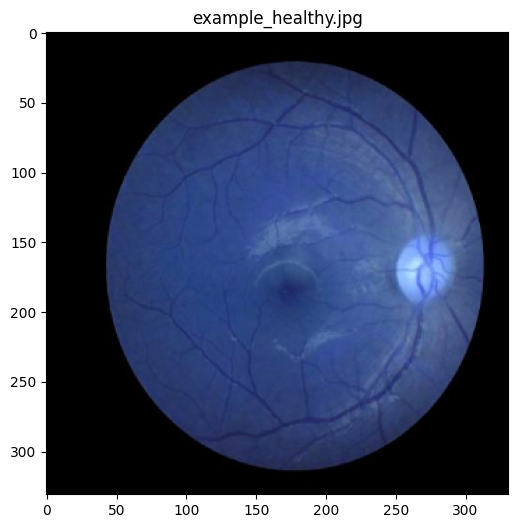

In [27]:
test_img_path = os.path.join("example_healthy.jpg")
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255
 
plt.figure(figsize=(6,6))
plt.title(test_img_path)
plt.imshow(resized_img[0])


img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
img = tf.reshape(img, (-1, 331, 331, 3))
prediction = model.predict(img / 255)


print("Prediction:", prediction)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

print("Labels:", possible_labels) # TODO check if this is matched properly
print("Predicted class:", possible_labels[predicted_class_index])